In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
pd.set_option('display.max_columns',None)

In [176]:
df = pd.read_csv('diabetes.csv')

In [177]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [178]:
#It's a imbalance Dataset
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [179]:
#all are integer and floats so no need of data converisons required
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [180]:
#There are no null values, so no need of handling missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [181]:
#divide the data into input and output
X = df.loc[:,df.columns!='Outcome']
y = df['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [182]:
#split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state = 66)
print(len(X_train),len(X_test))
print(len(y_train),len(y_test))

576 192
576 192


### Model Training process 

In [183]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score,mean_squared_error,f1_score,precision_score,recall_score,roc_auc_score,roc_curve

### Stratified Sampling Function
This function will test the accuracy of our model on different samples of the train and test data and will give the average best accuracy for our model

In [184]:
def stratSampling(model):
    accuracy,f1,pres,reca = [],[],[],[]
    SSS = StratifiedKFold(n_splits=10,shuffle=True,random_state=66)
    for train_dx,test_dx in SSS.split(X,y):
        x_train,x_test,y1_train,y1_test = X.iloc[train_dx],X.iloc[test_dx],y.iloc[train_dx],y.iloc[test_dx]
        model.fit(x_train,y1_train)
        y_pred = model.predict(x_test)
        
        accuracy.append(accuracy_score(y1_test,y_pred))
        f1.append(f1_score(y1_test,y_pred,average='macro'))
        pres.append(precision_score(y1_test,y_pred,average='macro'))
        reca.append(recall_score(y1_test,y_pred,average='macro'))
    
    return np.array(accuracy).mean(),np.array(f1).mean(),np.array(pres).mean(),np.array(reca).mean()

### KNN Algorithm

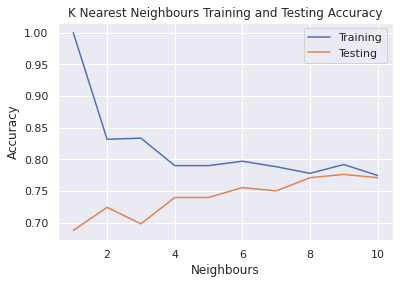

In [185]:
trAcc,testAcc = [],[]
for i in range(1,11):
    knnModel = KNeighborsClassifier(n_neighbors=i)
    knnModel.fit(X_train,y_train)
    
    y_pred = knnModel.predict(X_test)
    trAcc.append(knnModel.score(X_train,y_train))
    testAcc.append(knnModel.score(X_test,y_test))

plt.title('K Nearest Neighbours Training and Testing Accuracy')
plt.plot(range(1,11),trAcc,Label='Training')
plt.plot(range(1,11),testAcc,Label='Testing')
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')
leg = plt.legend()

### From the above graph,
#### K = 1, we have train accuracy very high and test accuracy is very less which leads our model to overfitting.
#### K = 10, we have both train and test accuracy are equal which leads our model to under fitting.
#### K = 2,3,4,5,6 are also has significant difference between the train and test accuracy.

So its always better to decide the K Value who has good accuracy and there should be some difference between train and test accuracy but the difference should not be too high and too low.

#### So based on above statements, we can conclude best K value for our model is 9 as the accuracy is good and there is a slight difference between the train and test accuracy.

In [186]:
knnModel = KNeighborsClassifier(n_neighbors=9)
knnModel.fit(X_train,y_train)
y_pred = knnModel.predict(X_test)

print('Train Accuracy:',knnModel.score(X_train,y_train))
print('Test Accuracy:',knnModel.score(X_test,y_test))
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('F1 Score',f1_score(y_test,y_pred,average='macro'))

fpr1,tpr1,th = roc_curve(y_test,y_pred)
print('\nROC Score',roc_auc_score(y_test,y_pred))

stAcc,stF1,stPr,stRe = stratSampling(knnModel)
print('\nAvg. Accuracy:',stAcc)
print('Avg. F1 Score:',stF1)

Train Accuracy: 0.7916666666666666
Test Accuracy: 0.7760416666666666
Accuracy Score: 0.7760416666666666
F1 Score 0.7508976254412697

ROC Score 0.748358208955224

Avg. Accuracy: 0.7409261790840739
Avg. F1 Score: 0.7011383317201286


### Logistic Regression

In [187]:
logReg = LogisticRegression(max_iter=200)
logReg.fit(X_train,y_train)

y_pred = logReg.predict(X_test)
print('Train Accuracy:',logReg.score(X_train,y_train))
print('Test Accuracy:',logReg.score(X_test,y_test))
print('Accuracy Score:',accuracy_score(y_pred,y_test))
print('F1 Score:',f1_score(y_pred,y_test,average='macro'))
#print('actual Precision:',precision_score(y_pred,y_test,average='macro'))
#print('actual Recall:',recall_score(y_pred,y_test,average='macro'))

fpr2,tpr2,th = roc_curve(y_test,y_pred)
print('\nROC_AUC Score: ',roc_auc_score(y_test,y_pred))

stAcc,stF1,stPr,stRe = stratSampling(logReg)
print('\nAvg. Accuracy:',stAcc)
print('Avg F1 Score:',stF1)

Train Accuracy: 0.7847222222222222
Test Accuracy: 0.7708333333333334
Accuracy Score: 0.7708333333333334
F1 Score: 0.7379652605459057

ROC_AUC Score:  0.7305074626865672

Avg. Accuracy: 0.7748120300751881
Avg F1 Score: 0.736768889901397


### Decision Tree

In [188]:
dTree = DecisionTreeClassifier(random_state = 0)
dTree.fit(X_train,y_train)
y_pred = dTree.predict(X_test)

print('Train Accuracy:',dTree.score(X_train,y_train))
print('Test Accuracy:',dTree.score(X_test,y_test))
print('Accuracy Score:',accuracy_score(y_pred,y_test))
print('F1 Score:',f1_score(y_pred,y_test,average='macro'))

fpr3,tpr3,th = roc_curve(y_test,y_pred)
print('\nROC_AUC Score: ',roc_auc_score(y_test,y_pred))

stAcc,stF1,stPr,stRe = stratSampling(dTree)
print('\nAvg. Accuracy:',stAcc)
print('Avg F1 Score:',stF1)

Train Accuracy: 1.0
Test Accuracy: 0.7135416666666666
Accuracy Score: 0.7135416666666666
F1 Score: 0.6952820660799307

ROC_AUC Score:  0.7038208955223881

Avg. Accuracy: 0.6966507177033494
Avg F1 Score: 0.6615251501204297


#### From the above model accuracy, our model is overfit as there is a huge difference between training and testing accuracy. So we need to tune the model to create a good model.
#### So we will tune hyper parameters and see the model accuracy and for that we will take max_depth hyper parameter because if this is not set the tree will go till the end

Text(0, 0.5, 'Accuracy')

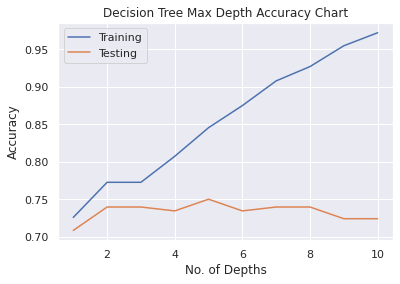

In [189]:
trainAcc,testAcc = [],[]
for i in range(1,11):
    dTree = DecisionTreeClassifier(max_depth=i,random_state = 0)
    dTree.fit(X_train,y_train)
    y_pred = dTree.predict(X_test)
    trainAcc.append(dTree.score(X_train,y_train))
    testAcc.append(dTree.score(X_test,y_test))

plt.title('Decision Tree Max Depth Accuracy Chart')
plt.plot(range(1,11),trainAcc,Label='Training')
plt.plot(range(1,11),testAcc,Label='Testing')
leg = plt.legend()
plt.xlabel('No. of Depths')
plt.ylabel('Accuracy')

### From the above graph, 
#### We can see, as the depth increase the model is getting overfitting so we need to choose the depth of the tree so that the diff between the training and testing is very less
#### From the graph observations depth = 1 have less training accuracy compared to depth = 2 and 3, as 2 and 3 has same accuracy we can consider the max_depth hyper parameter as 3

In [190]:
dTree = DecisionTreeClassifier(max_depth=3,random_state = 0)
dTree.fit(X_train,y_train)
y_pred = dTree.predict(X_test)
trainAcc.append(dTree.score(X_train,y_train))
testAcc.append(dTree.score(X_test,y_test))

print('Train Accuracy:',dTree.score(X_train,y_train))
print('Test Accuracy:',dTree.score(X_test,y_test))
print('Accuracy Score:',accuracy_score(y_pred,y_test))
print('F1 Score:',f1_score(y_pred,y_test,average='macro'))

fpr3,tpr3,th = roc_curve(y_test,y_pred)
print('\nROC_AUC Score: ',roc_auc_score(y_test,y_pred))

stAcc,stF1,stPr,stRe = stratSampling(dTree)
print('\nAvg. Accuracy:',stAcc)
print('Avg F1 Score:',stF1)

Train Accuracy: 0.7725694444444444
Test Accuracy: 0.7395833333333334
Accuracy Score: 0.7395833333333334
F1 Score: 0.7134328358208957

ROC_AUC Score:  0.7134328358208956

Avg. Accuracy: 0.7435235816814765
Avg F1 Score: 0.6966139230391952


### Random Forest Classifier

In [191]:
from sklearn.ensemble import RandomForestClassifier

rfClass = RandomForestClassifier(n_estimators = 100,random_state = 0)
rfClass.fit(X_train,y_train)
y_pred = rfClass.predict(X_test)

print('Train Accuracy:',rfClass.score(X_train,y_train))
print('Test Accuracy:',rfClass.score(X_test,y_test))
print('Accuracy Score:',accuracy_score(y_pred,y_test))
print('F1 Score:',f1_score(y_pred,y_test,average='macro'))

fpr4,tpr4,th = roc_curve(y_test,y_pred)
print('\nROC_AUC Score: ',roc_auc_score(y_test,y_pred))

stAcc,stF1,stPr,stRe = stratSampling(rfClass)
print('\nAvg. Accuracy:',stAcc)
print('Avg F1 Score:',stF1)

Train Accuracy: 1.0
Test Accuracy: 0.7864583333333334
Accuracy Score: 0.7864583333333334
F1 Score: 0.7624837823974897

ROC_AUC Score:  0.759820895522388

Avg. Accuracy: 0.7578605604921395
Avg F1 Score: 0.7190937210273358


#### Even for random forest our model is overfitted, so tune the model with hyperparameters max_depth

Text(0, 0.5, 'Accuracy')

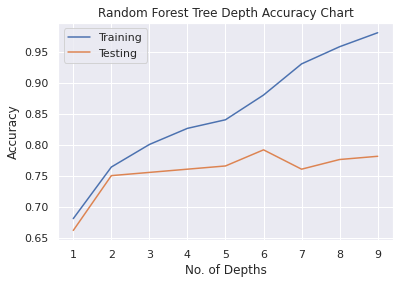

In [192]:
trainAcc,testAcc = [],[]
for i in range(1,10):
    rfClass = RandomForestClassifier(max_depth=i,n_estimators=100,random_state=0)
    rfClass.fit(X_train,y_train)
    
    trainAcc.append(rfClass.score(X_train,y_train))
    testAcc.append(rfClass.score(X_test,y_test))

plt.title('Random Forest Tree Depth Accuracy Chart')
plt.plot(range(1,10),trainAcc,Label='Training')
plt.plot(range(1,10),testAcc,Label='Testing')
leg = plt.legend()
plt.xlabel('No. of Depths')
plt.ylabel('Accuracy')

### From the above graph, max_depth = 2 gave the model with good accuracy. So tune the model with max_depth = 2

In [193]:
rfClass = RandomForestClassifier(max_depth = 2,n_estimators = 100,random_state = 0)
rfClass.fit(X_train,y_train)

y_pred = rfClass1.predict(X_test)
print('Train Accuracy:',rfClass.score(X_train,y_train))
print('Test Accuracy:',rfClass.score(X_test,y_test))
print('Accuracy Score:',accuracy_score(y_pred,y_test))
print('F1 Score:',f1_score(y_pred,y_test,average='macro'))

fpr4,tpr4,th = roc_curve(y_test,y_pred)
print('\nROC_AUC Score: ',roc_auc_score(y_test,y_pred))

stAcc,stF1,stPr,stRe = stratSampling(rfClass)
print('\nAvg. Accuracy:',stAcc)
print('Avg F1 Score:',stF1)

Train Accuracy: 0.7638888888888888
Test Accuracy: 0.75
Accuracy Score: 0.7864583333333334
F1 Score: 0.7429383143388956

ROC_AUC Score:  0.7286567164179104

Avg. Accuracy: 0.7252904989747095
Avg F1 Score: 0.6350364742253892


### Gradient Boosting

In [194]:
from sklearn.ensemble import GradientBoostingClassifier

gBoost = GradientBoostingClassifier(random_state=0)
gBoost.fit(X_train,y_train)

y_pred = gBoost.predict(X_test)

print('Train Accuracy:',gBoost.score(X_train,y_train))
print('Test Accuracy:',gBoost.score(X_test,y_test))
print('Accuracy Score:',accuracy_score(y_pred,y_test))
print('F1 Score:',f1_score(y_pred,y_test,average='macro'))

fpr5,tpr5,th = roc_curve(y_test,y_pred)
print('\nROC_AUC Score: ',roc_auc_score(y_test,y_pred))

stAcc,stF1,stPr,stRe = stratSampling(gBoost)
print('\nAvg. Accuracy:',stAcc)
print('Avg F1 Score:',stF1)

Train Accuracy: 0.9166666666666666
Test Accuracy: 0.7916666666666666
Accuracy Score: 0.7916666666666666
F1 Score: 0.7674136886735312

ROC_AUC Score:  0.7638208955223881

Avg. Accuracy: 0.7566643882433356
Avg F1 Score: 0.7230266408666305


#### This model also overfitted, so try to tune the model

Text(0, 0.5, 'Accuracy')

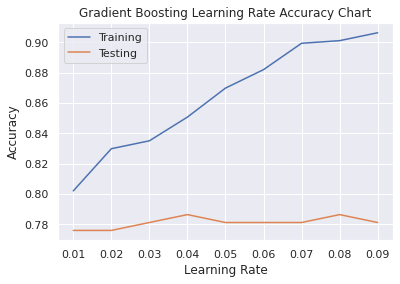

In [195]:
trainAcc,testAcc,iterArr = [],[],np.arange(0.01, 0.1, 0.01)
for i in iterArr:
    gBoost = GradientBoostingClassifier(learning_rate=i,random_state=0)
    gBoost.fit(X_train,y_train)
    
    trainAcc.append(gBoost.score(X_train,y_train))
    testAcc.append(gBoost.score(X_test,y_test))

plt.title('Gradient Boosting Learning Rate Accuracy Chart')
plt.plot(iterArr,trainAcc,Label='Training')
plt.plot(iterArr,testAcc,Label='Testing')
leg = plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

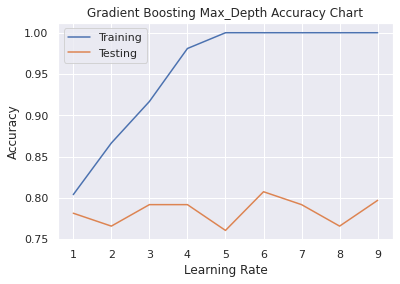

In [196]:
trainAcc,testAcc = [],[]
for i in range(1,10):
    gBoost = GradientBoostingClassifier(max_depth=i,random_state=0)
    gBoost.fit(X_train,y_train)
    
    trainAcc.append(gBoost.score(X_train,y_train))
    testAcc.append(gBoost.score(X_test,y_test))

plt.title('Gradient Boosting Max_Depth Accuracy Chart')
plt.plot(range(1,10),trainAcc,Label='Training')
plt.plot(range(1,10),testAcc,Label='Testing')
leg = plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

### From the above 2 graphs, tuning hyper parameters on both learning rate and max depth has given the best accuracy when they are in minimum and also there is no difference in terms of accuracy in choosing any of the parameters. So choose any one of the hyper parameter for training the model

In [197]:
gBoost = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gBoost.fit(X_train,y_train)

y_pred = gBoost.predict(X_test)

print('Train Accuracy:',gBoost.score(X_train,y_train))
print('Test Accuracy:',gBoost.score(X_test,y_test))
print('Accuracy Score:',accuracy_score(y_pred,y_test))
print('F1 Score:',f1_score(y_pred,y_test,average='macro'))

fpr5,tpr5,th = roc_curve(y_test,y_pred)
print('\nROC_AUC Score: ',roc_auc_score(y_test,y_pred))

stAcc,stF1,stPr,stRe = stratSampling(gBoost)
print('\nAvg. Accuracy:',stAcc)
print('Avg F1 Score:',stF1)

Train Accuracy: 0.8020833333333334
Test Accuracy: 0.7760416666666666
Accuracy Score: 0.7760416666666666
F1 Score: 0.7245704753961635

ROC_AUC Score:  0.7102686567164178

Avg. Accuracy: 0.7565618591934381
Avg F1 Score: 0.6952206254476433


### Support Vector Machine

In [202]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

print('Train Accuracy:',svc.score(X_train,y_train))
print('Test Accuracy:',svc.score(X_test,y_test))
print('Accuracy Score:',accuracy_score(y_pred,y_test))
print('F1 Score:',f1_score(y_pred,y_test,average='macro'))

fpr6,tpr6,th = roc_curve(y_test,y_pred)
print('\nROC_AUC Score: ',roc_auc_score(y_test,y_pred))

stAcc,stF1,stPr,stRe = stratSampling(svc)
print('\nAvg. Accuracy:',stAcc)
print('Avg F1 Score:',stF1)

Train Accuracy: 0.7690972222222222
Test Accuracy: 0.7552083333333334
Accuracy Score: 0.7552083333333334
F1 Score: 0.7164315117996418

ROC_AUC Score:  0.7081194029850746

Avg. Accuracy: 0.7565618591934381
Avg F1 Score: 0.7024625107992666


In [207]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

print('Train Accuracy:',svc.score(X_train_scaled,y_train))
print('Test Accuracy:',svc.score(X_test_scaled,y_test))
print('Accuracy Score:',accuracy_score(y_pred,y_test))
print('F1 Score:',f1_score(y_pred,y_test,average='macro'))

fpr6,tpr6,th = roc_curve(y_test,y_pred)
print('\nROC_AUC Score: ',roc_auc_score(y_test,y_pred))

stAcc,stF1,stPr,stRe = stratSampling(svc)
print('\nAvg. Accuracy:',stAcc)
print('Avg F1 Score:',stF1)

Train Accuracy: 0.7881944444444444
Test Accuracy: 0.796875
Accuracy Score: 0.796875
F1 Score: 0.7871699400278543

ROC_AUC Score:  0.805910447761194

Avg. Accuracy: 0.7565618591934381
Avg F1 Score: 0.7024625107992666


In [200]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.944
Accuracy on test set: 0.724


#### Scaling gives better accuracy than tuning C parameter. So choose the scaling model for SVM

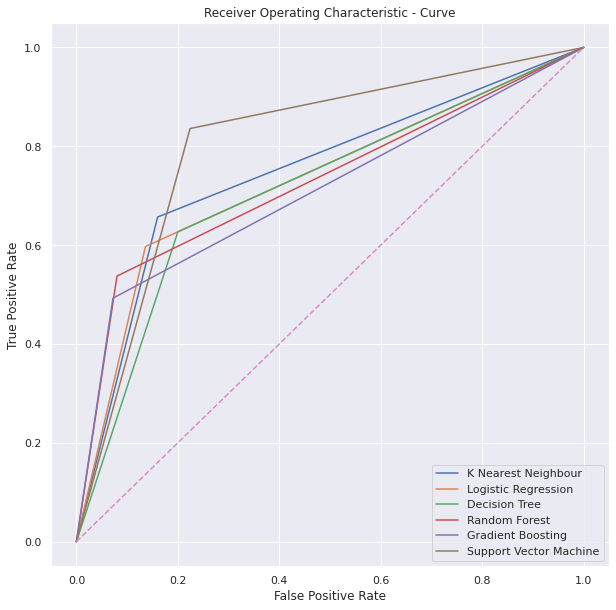

In [214]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Curve')
plt.plot(fpr1, tpr1, label='K Nearest Neighbour')
plt.plot(fpr2, tpr2, label='Logistic Regression')
plt.plot(fpr3, tpr3, Label='Decision Tree')
plt.plot(fpr4, tpr4, Label='Random Forest')
plt.plot(fpr5, tpr5, Label='Gradient Boosting')
plt.plot(fpr6, tpr6, Label='Support Vector Machine')

plt.plot([0, 1], ls="--")
leg = plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

# From the above ROC Curve, SVM giving the best accuracy than the other models. So choose SVM as the model for our predictions. Below are the consolidated accuracies for all the models


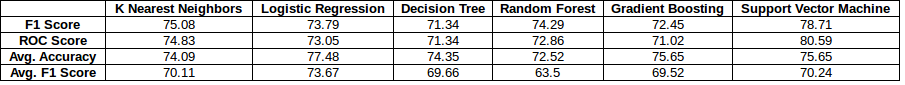

### Saving the Model to Pickle File

In [208]:
import pickle

file = open('DiabetesPredictionSVM.pkl','wb')
pickle.dump(svc,file)

In [211]:
fv = [6,85,40,0,50,20.2,1.543,29]
myPred = svc.predict([fv])
print(myPred)

[0]
